# Final Project: Solving the Issues of Jaya Jaya Maju Company


---

**Nama:** Aswin Setiawan   
**Email:** aswinrsixxx@gmail.com                 
**ID Dicoding:**-

---


Kisah di Balik Proyek Analisis Jaya Jaya Maju

1️⃣ Pendahuluan: Awal Perjalanan

Di suatu sudut dunia data science, seorang analis bernama Aswin mendapat tantangan besar:

- Menganalisis data pegawai di perusahaan Edutech untuk memahami faktor-faktor yang menyebabkan pegawai keluar dari perusahaan (attrition).

- Tujuannya? Membangun model machine learning yang bisa membantu perusahaan memprediksi pegawai mana yang berisiko keluar.

## Persiapan

2️⃣ Persiapan Data: Mengumpulkan Senjata untuk Perjalanan

- Sebelum masuk ke inti analisis, Aswin mengimpor library penting yang akan menjadi alat tempurnya:

In [1]:
import warnings  # Mengimpor modul warnings untuk mengelola peringatan
warnings.filterwarnings('ignore')  # Mengabaikan semua peringatan

import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data yang lebih menarik
from scipy import stats  # Mengimpor modul stats dari scipy untuk analisis statistik
import matplotlib.pyplot as plt  # Mengimpor matplotlib.pyplot untuk visualisasi data
from matplotlib import rcParams  # Mengimpor rcParams untuk mengatur parameter gaya matplotlib
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  # Mengimpor scaler untuk normalisasi data
from scipy.stats import boxcox  # Mengimpor fungsi boxcox untuk transformasi data
from imblearn import under_sampling, over_sampling  # Mengimpor teknik under-sampling dan over-sampling untuk menangani data tidak seimbang
import gdown  # Mengimpor gdown untuk mengunduh file dari Google Drive

from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi data training dan testing
from sklearn.preprocessing import LabelEncoder  # Mengimpor LabelEncoder untuk mengubah label kategori menjadi angka
from mlxtend.plotting import plot_confusion_matrix  # Mengimpor fungsi untuk menggambar matriks kebingungan
from sklearn.metrics import (  # Mengimpor berbagai metrik evaluasi untuk model
    accuracy_score,  # Metrik untuk menghitung akurasi
    precision_score,  # Metrik untuk menghitung presisi
    recall_score,  # Metrik untuk menghitung recall
    f1_score,  # Metrik untuk menghitung F1 score
    roc_auc_score,  # Metrik untuk menghitung area di bawah kurva ROC
    roc_curve,  # Fungsi untuk menghitung kurva ROC
    confusion_matrix,  # Fungsi untuk menghitung matriks kebingungan
    fbeta_score,  # Metrik untuk menghitung F-beta score
    make_scorer  # Fungsi untuk membuat scorer kustom
)
from sklearn.experimental import enable_halving_search_cv  # Mengaktifkan fitur HalvingGridSearchCV yang masih dalam tahap eksperimen
from sklearn.model_selection import (  # Mengimpor berbagai metode untuk validasi dan pencarian hyperparameter
    cross_validate,  # Mengimpor fungsi untuk melakukan cross-validation
    RandomizedSearchCV,  # Mengimpor RandomizedSearchCV untuk pencarian hyperparameter secara acak
    GridSearchCV,  # Mengimpor GridSearchCV untuk pencarian hyperparameter secara grid
    HalvingGridSearchCV  # Mengimpor HalvingGridSearchCV untuk pencarian hyperparameter dengan metode pengurangan
)

from sklearn.ensemble import (  # Mengimpor model ensemble
    RandomForestClassifier,  # Mengimpor RandomForestClassifier untuk klasifikasi menggunakan Random Forest
    GradientBoostingClassifier  # Mengimpor GradientBoostingClassifier untuk klasifikasi menggunakan Gradient Boosting
)

from sklearn.linear_model import (  # Mengimpor model regresi linier
    LogisticRegression,  # Mengimpor LogisticRegression untuk klasifikasi biner
    Ridge,  # Mengimpor Ridge untuk regresi linier dengan regularisasi L2
    Lasso,  # Mengimpor Lasso untuk regresi linier dengan regularisasi L1
    ElasticNet  # Mengimpor ElasticNet untuk regresi linier dengan kombinasi regularisasi L1 dan L2
)
from sklearn.svm import SVR  # Mengimpor Support Vector Regression untuk regresi menggunakan Support Vector Machines
from sklearn.metrics import (  # Mengimpor berbagai metrik evaluasi untuk model
    confusion_matrix,  # Mengimpor fungsi untuk menghitung matriks kebingungan
    classification_report,  # Mengimpor fungsi untuk menghasilkan laporan klasifikasi
    accuracy_score,  # Mengimpor fungsi untuk menghitung akurasi
    precision_score,  # Mengimpor fungsi untuk menghitung presisi
    recall_score,  # Mengimpor fungsi untuk menghitung recall
    f1_score  # Mengimpor fungsi untuk menghitung F1 score
)
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor KNeighborsClassifier untuk algoritma K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier  # Mengimpor DecisionTreeClassifier untuk algoritma pohon keputusan
from sklearn.naive_bayes import GaussianNB  # Mengimpor GaussianNB untuk algoritma Naive Bayes
from xgboost import XGBClassifier  # Mengimpor XGBClassifier untuk algoritma XGBoost
from lightgbm import (  # Mengimpor LightGBM untuk algoritma gradient boosting
    LGBMClassifier,  # Mengimpor LGBMClassifier untuk klasifikasi menggunakan LightGBM
    reset_parameter,  # Mengimpor fungsi untuk mereset parameter model
    LGBMClassifier  # Mengimpor LGBMClassifier (duplikat, bisa dihapus)
)

- Lalu, ia memuat dataset pegawai:

In [2]:
import pandas as pd

# URL raw file CSV di GitHub
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"

# Memuat file CSV ke dalam DataFrame pandas
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama DataFrame
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

Lalu ia pun mencoba mengecek kelengkapan dan berbagai infi mengenai data yang akan diproses

In [3]:
df.shape

(1470, 35)

In [4]:
# Mengecek apakah ada data yang NaN/Null
print(df.isnull().values.any())
print(df.isna().sum())

True
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
Yea

In [5]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [7]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.duplicated().sum()

np.int64(0)

- Dari hasil pengecekan, terlihat bahwa kolom "Attrition" memiliki beberapa nilai kosong dan tidak ada data duplikat.

## Data Preparation / Preprocessing

3️⃣ Data Cleaning: Membersihkan Data untuk Perjalanan yang Mulus

- Untuk menangani data yang hilang, Aswin mengisi nilai kosong pada "Attrition" dengan 0:

### Handling Missing Value


In [9]:
df['Attrition'] = df['Attrition'].fillna(0)

In [10]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


### Feature Engineering

4️⃣ Feature Engineering: Menciptakan Peta agar Tidak Tersesat

Aswin tidak hanya ingin menggunakan data mentah, tetapi juga ingin membuat fitur baru yang lebih informatif dengan cara Mengelompokkan Usia, Mengelompokkan Jarak Tempuh ke Kantor, menghapus kolom yang tidak relevan:


- Mengelompokkan Usia

In [11]:
def Generation(x):
    if x['Age'] >= 18 and x['Age'] <= 27:
        kelompok = 'GenZ'
    elif x['Age'] >= 28 and x['Age'] <= 42:
        kelompok = 'Milenial'
    else:
        kelompok  = 'GenX'
    return kelompok

df['Age_group'] = df.apply(lambda x: Generation(x), axis=1)

- Mengelompokkan Jarak Tempuh ke Kantor

In [12]:
def distance(x):
    if x['DistanceFromHome'] >= 1 and x['DistanceFromHome'] <= 5:
        kelompok = 'Walking_distance'
    elif x['DistanceFromHome'] >= 6 and x['DistanceFromHome'] <= 25:
        kelompok = 'Intermediate_distance'
    else:
        kelompok  = 'Great_distance'
    return kelompok

df['DistanceGroup'] = df.apply(lambda x: distance(x), axis=1)

In [13]:
# Mapping
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['Education'] = df['Education'].map(education_map)

job_level_mapping = {
    1: 'Staff',
    2: 'Junior Supervisor',
    3: 'Senior Supervisor',
    4: 'Junior Manager',
    5: 'Senior Manager'
}
df['JobLevel'] = df['JobLevel'].map(job_level_mapping)

- Kemudian, ia juga menghapus kolom yang tidak relevan:

In [14]:
df.drop(['StandardHours','EmployeeCount', 'Over18'],axis=1,inplace=True)


## Exploratory Data Analysis


5️⃣ Exploratory Data Analysis (EDA): Mencari Pola Tersembunyi

Sebelum masuk ke pemodelan, Aswin ingin melihat pola dalam data menggunakan visualisasi.

In [15]:

df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df['Attrition'].value_counts()

,count
Attrition,
0,1291
1,179


- Distribusi Pegawai yang Keluar vs Tidak Keluar

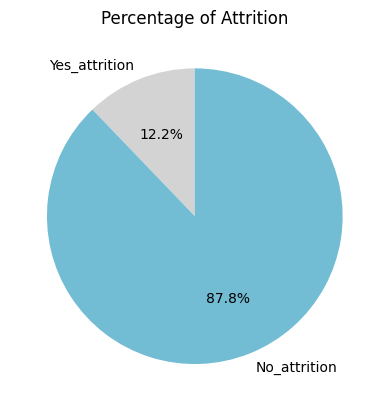

In [16]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition'] == 0]

attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

categories = ['Yes_attrition', 'No_attrition']
counts = [attrition_count, no_attrition_count]

plt.title('Percentage of Attrition')
plt.pie(counts, labels = categories, startangle = 90, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
plt.show()

- Distribusi attrition berdasarkan kelompok usia

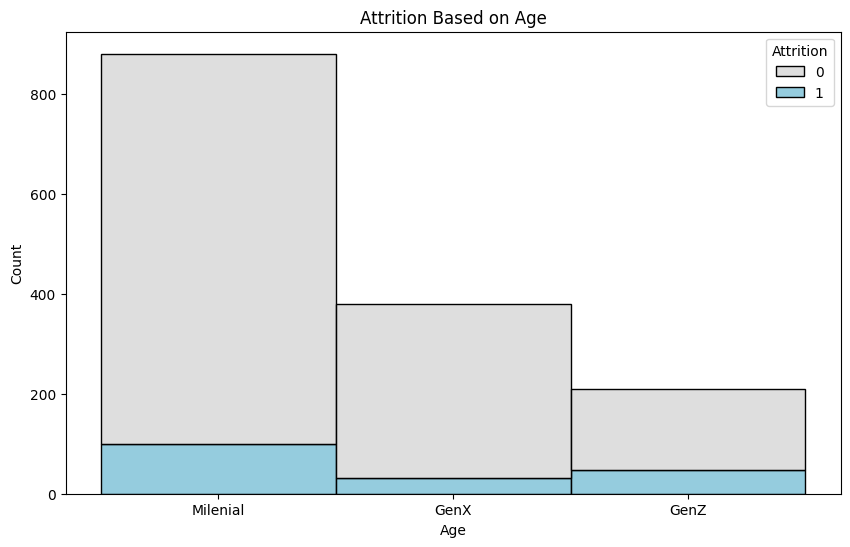

In [17]:
colors=["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age_group", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- Distribusi attrition berdasarkan kelompok jarak rumah ke kantor

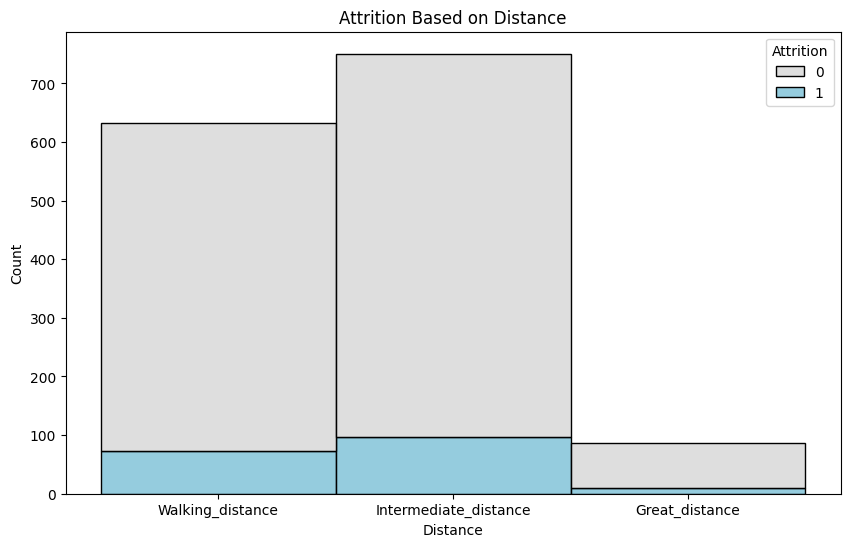

In [18]:
colors=["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="DistanceGroup", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Distance")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show()

- Distribusi attrition berdasarkan gender

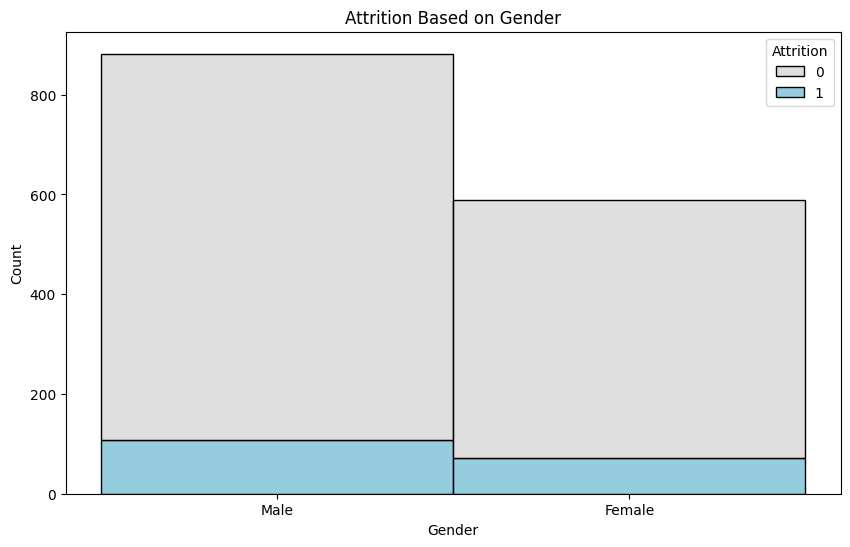

In [19]:
colors=["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Gender", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

- Distribusi attrition berdasarkan departemen

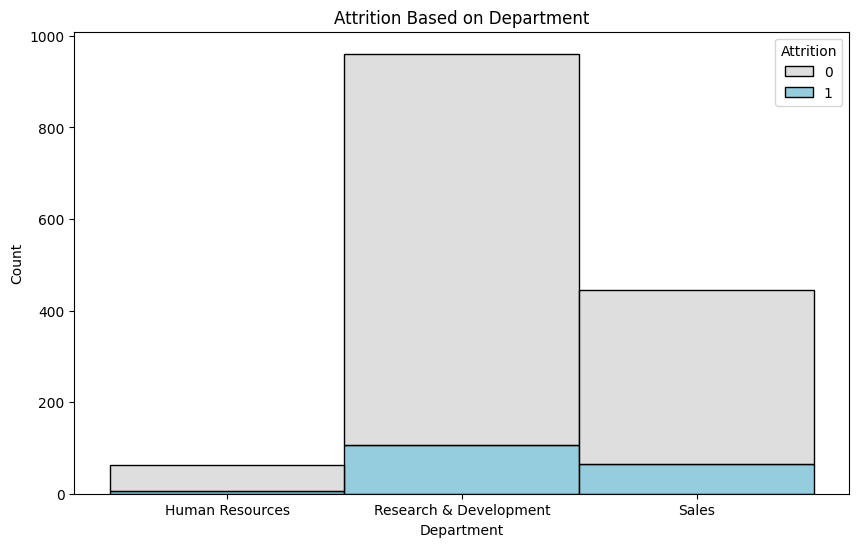

In [20]:
colors=["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Department", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

- Distribusi attrition berdasarkan tingkat pendidikan

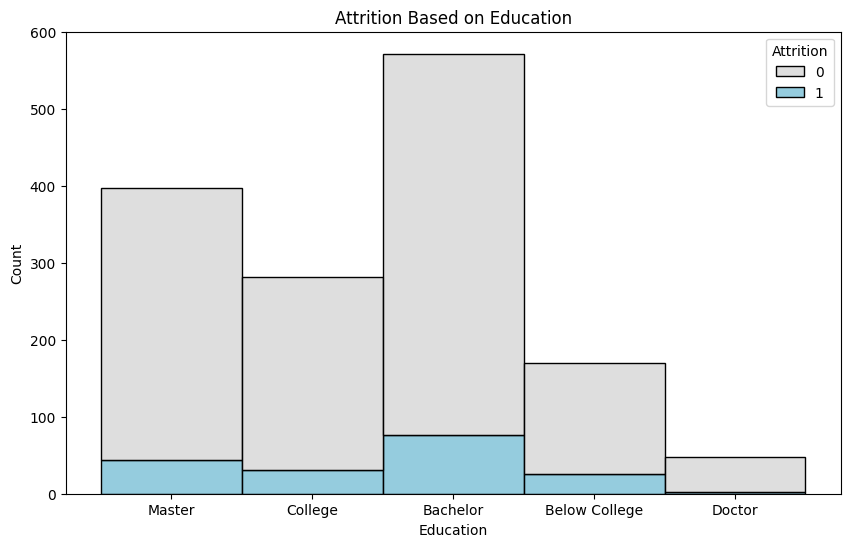

In [21]:
colors=["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Education", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

## Modeling

6️⃣ Modeling: Mencari Algoritma Terbaik

Setelah memahami pola dalam data, Aswin mulai membangun model machine learning.

In [22]:
# Filter Categorical Features
cats = df.select_dtypes(exclude=['int32','int64','float32','float64'])
cats.head()

,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,OverTime,Age_group,DistanceGroup
0,Travel_Frequently,Human Resources,Master,Other,Male,Staff,Human Resources,Married,Yes,Milenial,Walking_distance
1,Travel_Rarely,Research & Development,College,Medical,Female,Junior Supervisor,Healthcare Representative,Married,No,Milenial,Intermediate_distance
2,Travel_Rarely,Research & Development,Master,Life Sciences,Male,Staff,Research Scientist,Married,Yes,GenX,Walking_distance
3,Travel_Frequently,Sales,Bachelor,Marketing,Female,Junior Manager,Sales Executive,Married,No,Milenial,Great_distance
4,Travel_Rarely,Research & Development,Master,Medical,Female,Staff,Research Scientist,Married,No,Milenial,Walking_distance


In [23]:
cats.nunique()

,0
BusinessTravel,3
Department,3
Education,5
EducationField,6
Gender,2
JobLevel,5
JobRole,9
MaritalStatus,3
OverTime,2
Age_group,3


In [24]:
label_encoder=LabelEncoder()
columns_to_encode = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
                     'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime', 'Age_group',
                     'DistanceGroup']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [25]:

df_new = df.drop(['YearsInCurrentRole' , 'YearsSinceLastPromotion', 'YearsWithCurrManager'],axis=1)
df_new.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Age_group,DistanceGroup
0,1,38,0,1,1444,0,1,4,4,4,...,11,3,2,1,7,2,3,6,2,2
1,2,37,1,2,1141,1,11,2,3,1,...,15,3,1,0,15,2,1,1,2,1
2,3,51,1,2,1323,1,4,4,1,1,...,12,3,3,3,18,2,4,10,0,2
3,4,42,0,1,555,2,26,0,2,3,...,14,3,4,1,23,2,4,20,2,0
4,5,40,0,2,1194,1,2,4,3,3,...,14,3,2,3,20,2,3,5,2,2


- Membagi Data Menjadi Train dan Test

In [26]:
X=np.array(df_new.drop(['Attrition'],axis=1))
y=np.array(df_new['Attrition'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1176, 30)
(294, 30)


- Normalisasi Data

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train & Memilih Model


In [29]:
# Insialisasi model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced')

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():

    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predictions = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

7️⃣ Evaluasi Model: Menemukan yang Terbaik

Aswin menguji beberapa model untuk menemukan mana yang memiliki akurasi terbaik.

In [30]:
# Menampilkan evaluasi setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.731293,0.65625,0.235955,0.347107
Decision Trees,0.826531,0.15625,0.172414,0.163934
Random Forest,0.894558,0.06250,0.666667,0.114286
Naive Bayes,0.857143,0.31250,0.333333,0.322581
K-Nearest Neighbor,0.884354,0.03125,0.250000,0.055556


Dari hasil evaluasi, Random Forest memiliki akurasi tertinggi, sehingga dipilih sebagai model final.

Memilih Model Random Forest (Klasifikasi)


#### Membuat Model Random Forest


In [31]:

# Memanggil model Random Forest
rf = RandomForestClassifier()

In [32]:

# Melakukan training model
rfmodel = rf.fit(X_train,y_train)
#print(rdf_model)

# Melakukan prediksi dengan training model
y_train_rf = rfmodel.predict(X_train)
print(y_train_rf.shape)

(1176,)


In [33]:

# Melakukan prediksi dengan testing model
y_test_rf = rfmodel.predict(X_test)
print(y_test_rf.shape)

(294,)


## Evaluation

### Melakukan Evaluasi Model Random Forest


In [34]:
# classification report - training model
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_rf))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00       147

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



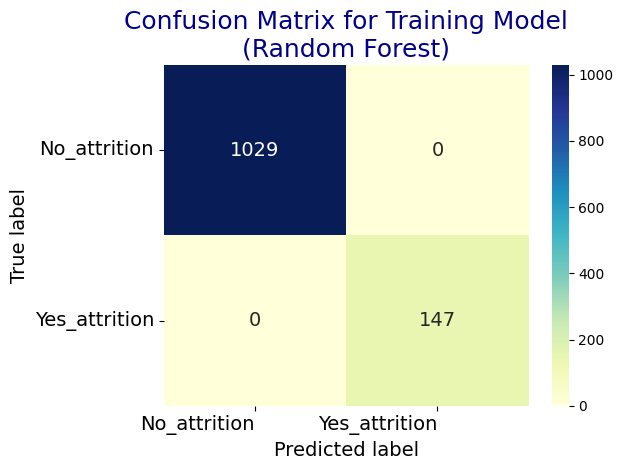

In [35]:

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_rf)), ('No_attrition', 'Yes_attrition'),('No_attrition', 'Yes_attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## Evaluasi Testing Model


In [36]:

# classification report - testing model
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_rf))


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       262
           1       0.67      0.06      0.11        32

    accuracy                           0.89       294
   macro avg       0.78      0.53      0.53       294
weighted avg       0.87      0.89      0.85       294



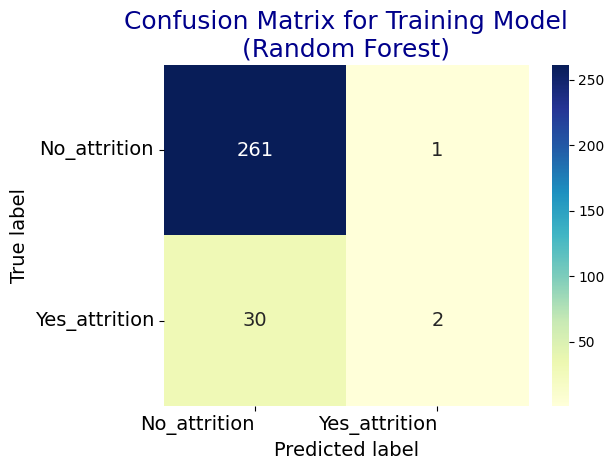

In [37]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_rf)), ('No_attrition', 'Yes_attrition'), ('No_attrition', 'Yes_attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## Hyperparameter Tunning


8️⃣ Hyperparameter Tuning: Mengoptimalkan Model Terbaik

Sekarang, Aswin ingin meningkatkan performa model terbaiknya, yaitu Random Forest, dengan melakukan hyperparameter tuning menggunakan GridSearchCV.

- Menyesuaikan Parameter Random Forest

In [38]:
#List Hyperparameters yang akan diuji
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf = GridSearchCV(estimator = rfmodel, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2)

#Fitting Model
best_model = clf.fit(X_train,y_train)

#Nilai hyperparameters terbaik
print('Best parameter        :', best_model.best_estimator_)

#Prediksi menggunakan model baru
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Check performa dari model
# classification report - training model
print('\nClassification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

# classification report - testing model
print('\nClassification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter        : RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=300)

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1029
           1       1.00      0.14      0.25       147

    accuracy                           0.89      1176
   macro avg       0.95      0.57      0.60      1176
weighted avg       0.90      0.89      0.86      1176


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       262
           1       1.00      0.03      0.06        32

    accuracy                           0.89       294
   macro avg       0.95      0.52      0.50       294
weighted avg       0.91      0.89      0.85 

9️⃣Deployment: Menggunakan Model untuk Prediksi Nyata

Setelah model sudah optimal, saatnya menyimpan model untuk dipakai dalam sistem perusahaan.

In [39]:
import joblib

# Melakukan export model
joblib.dump(best_model, "Best_model_random_forest.joblib")

['Best_model_random_forest.joblib']